In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# disable spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = False

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 5.0
neo.model.models["Ventilator"].insp_flow = 12.0

# turn on the ventilator
neo.model.models["Ventilator"].switch_ventilator(True)

# stabilize by calculating 120 seconds
neo.fastforward(60)

Ready in 3.2 sec. Average model step in 0.0267 ms.


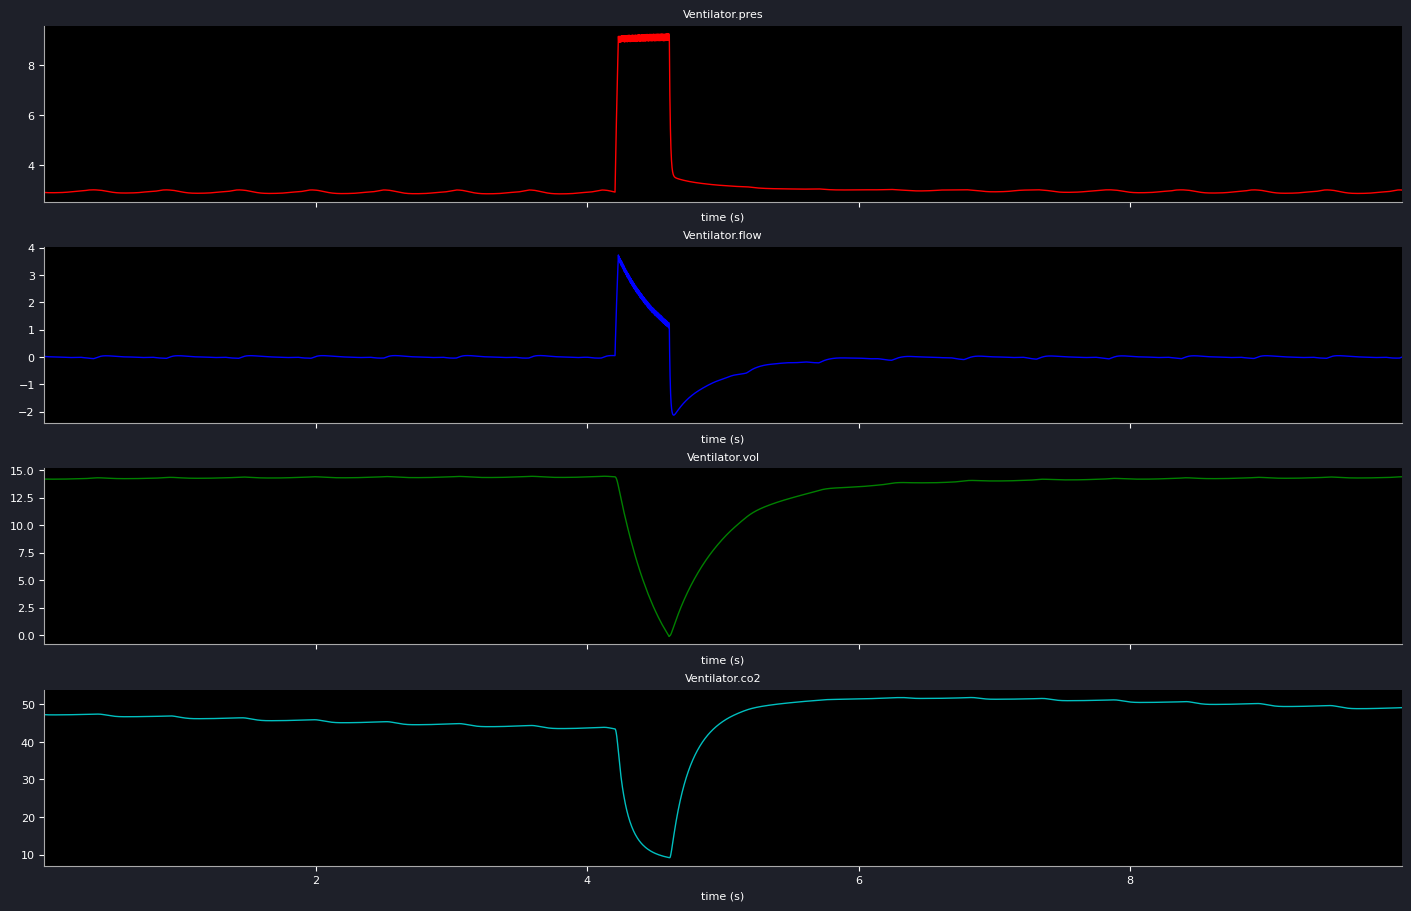

In [2]:
neo.plot_ventilator_curves(time_to_calculate=10)

In [ ]:
neo.get_vitals()

In [ ]:
neo.analyze(["Ventilator.exp_tidal_volume"], time_to_calculate=20)

In [ ]:
neo.analyze(["Breathing.exp_tidal_volume"], time_to_calculate=20)

In [ ]:
neo.model.models["Ventilator"].pip_cmh2o

In [ ]:
neo.plot_time_graph(["Ventilator._exp_tidal_volume_counter", "Ventilator.exp_tidal_volume"], time_to_calculate=20, fill=False)